Course: **Digital Marketing Strategy**
Lecturer: **Leontine van Geffen-Wenink, Ph.D. Candidate** & **Debarati Bhaumik, Ph.D.**

Team 1: **Team Spinning Vibe**
* Paul Antony | 500938419 
* Carl Hümbs | 500927977 
* Matthijs Snijders | 500780453 
* Otto Tagapere | 500930931 

Introduction: Within this Jupyter Notebook, the **Dataset Merging**, **Data Cleaning**, **EDA - *Exploratory Data Analysis*** and some first **Feature Engineering** will take place. Further the dataset will be exported in a new CSV, which can then be used to test our hypotheses in different jupyter notebooks (the **Testing_H1-4** notebooks) within this repository.

# **EDA & Cleaning Notebook**

In [556]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Data Preprocessing and Cleaning**

Within this first chapter, the Datasets will be merged and *prepared for further Exploratory Data Analysis or Feature Engineering.* 

In [557]:
#importing the 4 csv files
df_1 = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/01_original%20theme%20park%20datasets/Themeparcs%20I.csv?token=GHSAT0AAAAAACPJTRO6YHOXTFAG56P57LV6ZPQHJFQ', delimiter=';')
df_2 = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/01_original%20theme%20park%20datasets/Themeparcs%20II.csv?token=GHSAT0AAAAAACPJTRO7BYOUWE2CLI6AFLXMZPQHNDQ', delimiter=';')
df_3 = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/01_original%20theme%20park%20datasets/Themeparcs%20III.csv?token=GHSAT0AAAAAACPJTRO6XX66HWSEJ6XWSRBMZPQHN3A', delimiter=';')
df_4 = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/01_original%20theme%20park%20datasets/Themeparcs%20IV.csv?token=GHSAT0AAAAAACPJTRO7CPU4UIDQ5MBDQZIUZPQHK7A', delimiter=';')

In [558]:
#merging the 4 csv files into 1 single dataframe

#concatenate the DataFrames along the rows
df = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)
#to verify the combined DataFrame
df.head()

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


The dataset contains the following columns:

* **Date:** The date and time when the social media post was made. <br>
* **Profile:** The name or identifier of the social media profile or page for the theme park.<br>
* **Message:** The text content of the social media post.<br>
* **Number of Reactions:** The count of reactions (such as likes, loves, etc.) received on the post.<br>
* **Number of Comments (primary):** The number of primary comments made on the post.<br>
* **Number of Shares:** The count of times the post has been shared by users.<br>
* **Comments per post:** The average number of comments received per post.<br>
* **Comments on posts by fans:** The count of comments made on the posts by fans.<br>
* **Post interaction rate:** A metric that may represent the level of interaction a post received relative to some standard.<br>
* **Engagement:** A measure of overall user engagement with the post, potentially aggregating multiple metrics.<br>
* **Number of Likes:** The count of 'likes' specifically received on the post.<br>
* **Link-posts, Picture Posts, Video-posts:** These columns appear to indicate the presence or absence of different types of content in the posts, such as links, pictures, and videos respectively.<br>
* **Profile-ID:** A unique identifier for the social media profile.<br>
* **Post-ID:** A unique identifier for the social media post.<br>
* **Link:** A web link (URL) to the actual social media post.<br>

Next, we want to gain some more information about the dataset. Like **Length, Means, Counts, DataTypes, Null Values** and **Dublicates**.

In [559]:
#display the number of rows
df_original_len = len(df)
print('Original length of dataframe:', df_original_len)

#display the most important statistics of the df
df.describe()

Original length of dataframe: 15443


,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Number of Likes,Link-posts,Picture Posts,Video-posts
count,15443.000000,0.0,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,555.0,11562.0,2479.0
mean,494.282911,NaN,34.199702,62.078288,52.954737,52.954737,355.763453,1.0,1.0,1.0
std,3717.067171,NaN,182.409237,507.937148,265.913045,265.913045,2509.935344,0.0,0.0,0.0
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
25%,22.000000,NaN,1.000000,2.000000,1.000000,1.000000,19.000000,1.0,1.0,1.0
50%,67.000000,NaN,6.000000,6.000000,8.000000,8.000000,55.000000,1.0,1.0,1.0
75%,217.000000,NaN,18.000000,21.000000,27.000000,27.000000,177.000000,1.0,1.0,1.0
max,210756.000000,NaN,8379.000000,30762.000000,11170.000000,11170.000000,124591.000000,1.0,1.0,1.0


The numerical description summarizes the following statistical measures for several social media metrics:

* **Number of Reactions:** The posts have a wide range of reactions, with an average of approximately 494. The standard deviation is quite large at around 3717, indicating significant variability in how posts are reacted to. The maximum number of reactions received by a post is 210,756, showcasing some posts with exceptionally high engagement.

* **Number of Comments (primary) and Number of Shares.1:** These columns have their descriptive statistics missing in the output, likely due to all values being NaN or non-numeric, which suggests these columns may require data cleaning or further investigation.

* **Comments per post:** On average, there are about 62 comments per post, with a median value of 6, indicating a right-skewed distribution where most posts have fewer comments, but a few posts receive a lot.

* **Comments on posts by fans:** Posts have an average of 52 comments from fans, again with a high standard deviation. The median of 8 suggests that comments are typically low for most posts, with a few outliers having a very high number of comments.

* **Number of Likes:** The average number of likes is approximately 355, with a median of 55, pointing towards a distribution where most posts receive a moderate number of likes, with some posts being exceptionally well-received.

* **Link-posts, Picture Posts, Video-posts:** The count data for these columns are limited, indicating that these types of posts are less frequent or the data is not fully captured. The maximum value is 1, which may suggest that these columns were intended to be binary indicators (0 or 1) for the presence of a link, picture, or video in the post.

Overall, the data reveals a distribution of engagement metrics that are **heavily skewed, with a small number of posts achieving very high interaction rates.** The presence of high standard deviation across these metrics *indicates that there is a wide disparity in how different posts perform on social media.* 

In [560]:
df.dtypes

Date                             object
Profile                          object
Message                          object
Number of Reactions             float64
Number of Shares                float64
Number of Comments (primary)    float64
Number of Shares.1              float64
Comments per post               float64
Comments on posts by fans       float64
Post interaction rate            object
Engagement                       object
Number of Likes                 float64
Link-posts                      float64
Picture Posts                   float64
Video-posts                     float64
Profile-ID                       object
Post-ID                          object
Link                             object
dtype: object

In [561]:
#check if there are rows without data
df.isnull().sum()

Date                                0
Profile                             0
Message                             0
Number of Reactions                 0
Number of Shares                15443
Number of Comments (primary)        0
Number of Shares.1                  0
Comments per post                   0
Comments on posts by fans           0
Post interaction rate               0
Engagement                          0
Number of Likes                     0
Link-posts                      14888
Picture Posts                    3881
Video-posts                     12964
Profile-ID                          0
Post-ID                             0
Link                                0
dtype: int64

In [562]:
#check if the two columns 'Comments per post' and 'Comments on posts by fans' have the same values
columns_are_equal = df['Comments per post'].equals(df['Comments on posts by fans'])
#print the result
print(f"Are the two columns identical? {columns_are_equal}")

Are the two columns identical? True


Reviewing the dataset, we have identified that the columns 'Comments per post' and 'Comments on posts by fans' contain identical data, as indicated by a comparison check resulting in a confirmation of their equality. To streamline our dataset and eliminate redundancy, we will remove one of these duplicate columns in the **Cleaning the Dataset** Part. Moreover, the concern regarding missing values is minimal, as there are very few across the dataset. *The columns 'Link-posts', 'Picture Posts', and 'Video-posts' are set to be consolidated into a single column* in the **'Testing_H2' Notebook**, which will contain further analyses.

## **Cleaning the Dataset**

In [563]:
#dropping the "Number of Shares" column as it is empty in every single row of the dataset
df.drop(columns=['Number of Shares', 'Comments on posts by fans'], inplace=True)

In [564]:
#list of columns to convert to integers
columns_to_convert = ['Number of Reactions', 'Number of Comments (primary)', 'Number of Shares.1', 
                      'Comments per post', 'Number of Likes']

#convert float values to integers
df[columns_to_convert] = df[columns_to_convert].astype(int)

#verify the changes
print(df.dtypes)

Date                             object
Profile                          object
Message                          object
Number of Reactions               int32
Number of Comments (primary)      int32
Number of Shares.1                int32
Comments per post                 int32
Post interaction rate            object
Engagement                       object
Number of Likes                   int32
Link-posts                      float64
Picture Posts                   float64
Video-posts                     float64
Profile-ID                       object
Post-ID                          object
Link                             object
dtype: object


In [565]:
#remove the comma from the string and convert it to a float
df['Engagement'] = df['Engagement'].str.replace(',', '.').astype(float)

In [566]:
#for better overview, we will change the names of the columns
df.rename(columns={'Date': 'date', 'Profile': 'profile','Message': 'message', 'Number of Reactions': 'nr_reactions', 'Number of Comments (primary)': 'nr_comments', 'Number of Shares.1': 'nr_shares', 'Comments per post': 'comments/post', 'Post interaction rate': 'post_interaction_rate', 'Engagement': 'engagement', 'Number of Likes': 'nr_likes', 'Link-posts': 'link_posts', 'Picture Posts': 'picture_posts', 'Video-posts': 'video_posts','Profile-ID': 'profile_id','Post-ID': 'post_id','Link': 'link',}, inplace=True)
#display the pfofile column in small letters
df['profile'] = df['profile'].str.lower()

In [567]:
#display changes
df.head()

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In last part, the following steps were done:
* dropping dublicate columns
* convert previous object columns into float64
* rename the columns

After those steps, data was prepared, even thought the essence of the data wasnt changed. With this we want to show a clean dataset but still keep the basis of the distribution for the following EDA.

## **Adding the Level 2 Variable (Followers)**

As we continue the analysis of US theme parks social media posts, we now look into the **Level 2 variable**, which is the **number of Facebook followers.** This metric provides a *quantitative measure of the theme parks' reach and popularity on the platform*, offering valuable insights into the **size of their digital audience.** By integrating this variable into our dataset, we aim to enrich our analysis, allowing us to investigate potential correlations between follower count and engagement metrics, and to understand the impact of social media capital on communication strategies. This additional layer of data offers a more nuanced view of the theme parks' social media dynamics and their ability to attract and maintain a dedicated following. We will further work with this Feature in the Notebook: **Multi-level_Analysis**.

In [568]:
#read the excel file into a dataframe
level2_df = pd.read_excel('Themepark_Followers.xlsx')
#to check the first few rows of the dataframe, you can use
print(level2_df.head())


                      Profile  Followers
0  Wild Adventures Theme Park         72
1            Fun Spot America     100000
2       Silverwood Theme Park     381000
3                Belmont Park      51000
4            SeaWorld Orlando     267000


In [569]:
#rename the columns
level2_df.rename(columns={'Followers': 'followers', 'Profile': 'profile',}, inplace=True)
#display the pfofile column in small letters
level2_df['profile'] = level2_df['profile'].str.lower()
level2_df.head(1)

,profile,followers
0,wild adventures theme park,72


In [570]:
# Merge 'combined_df' with 'level2_df' on the 'profile' column
combined_df = df.merge(level2_df, on='profile', how='left')
#show combined_df
combined_df.head()

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,72
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000


In [571]:
#check again if there are rows without data
combined_df.isnull().sum()

date                         0
profile                      0
message                      0
nr_reactions                 0
nr_comments                  0
nr_shares                    0
comments/post                0
post_interaction_rate        0
engagement                   0
nr_likes                     0
link_posts               14888
picture_posts             3881
video_posts              12964
profile_id                   0
post_id                      0
link                         0
followers                    0
dtype: int64

In [572]:
#count the number of unique profiles
number_of_profiles = combined_df['profile'].nunique()
#display the number of unique profiles
print("Number of unique profiles (Nr. of Themeparks):", number_of_profiles)

Number of unique profiles (Nr. of Themeparks): 59


### *Summary of **1. Data Preprocessing and Cleaning***

The dataset provides insights into social media interactions related to themeparks. It shows no missing values for most engagement metrics like reactions, comments, shares, likes, and follower counts, indicating a complete record for these parameters. However, there are a significant number of missing entries in content-type specific columns: link posts, picture posts, and video posts, which may affect the analysis of content engagement patterns. With **59 unique themepark profiles**, the dataset seems diverse, likely representing a broad spectrum of themepark social media presence. This diversity can offer valuable comparisons of engagement strategies and audience responses across different themeparks. The followers column is consistently populated, **suggesting that follower metrics are well maintained across profiles.** The availability of this data can provide an opportunity to analyze how follower count correlates with engagement and content type popularity.

In conclusion, the dataset appears robust for engagement and follower metrics, offering a **solid foundation for analyzing social media strategies and audience interaction in the themepark industry.**

# **2. EDA (Exploratory Data Analysis)**


Now that the df is prepared, we will perform the **Exploratory Data Analysis (EDA)**. Exploratory Data Analysis (EDA) is an essential process for understanding and analyzing data. It is a critical step in the data analysis pipeline, where analysts can perform initial investigations to uncover patterns, insights, and anomalies in data. 

In [573]:
#list all the columns which are in the df
print(df.columns)

Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'engagement',
       'nr_likes', 'link_posts', 'picture_posts', 'video_posts', 'profile_id',
       'post_id', 'link'],
      dtype='object')


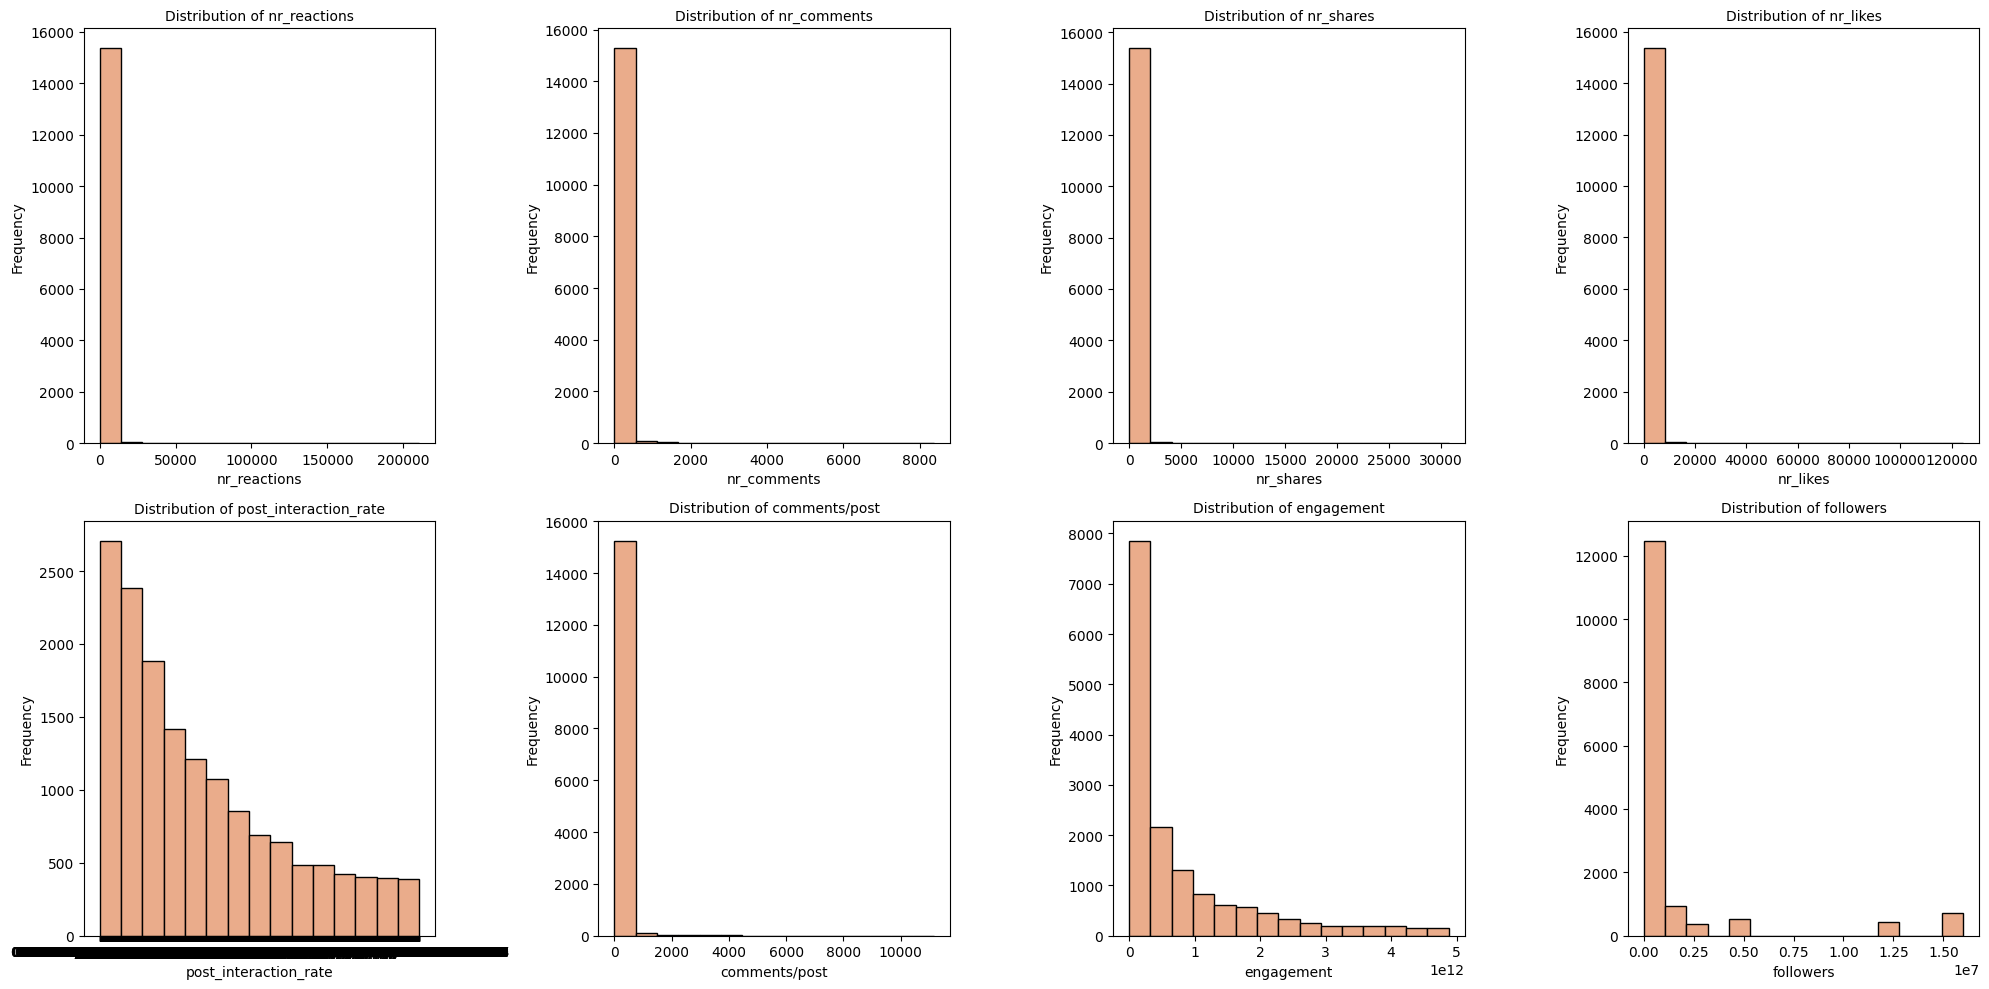

In [574]:
numeric_columns = ['nr_reactions', 'nr_comments', 'nr_shares', 'nr_likes',
                   'post_interaction_rate', 'comments/post', 'engagement', 'followers']

#set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2x4 grid, figsize can be adjusted

#flatten the array of axes for easy iteration
axs = axs.ravel()

#loop through the numeric columns and create a histogram for each
for i, col in enumerate(numeric_columns):
    #you can adjust the number of bins for better visualization
    axs[i].hist(combined_df[col].dropna(), bins=15, color='#eaac8b', edgecolor='black')
    axs[i].set_title(f'Distribution of {col}', fontsize=10)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

#adjust layout for better readability
plt.tight_layout()

#display the plots
plt.show()

In this first set of graphs, the histograms depicting the distributions of various engagement metrics for themepark social media profiles. These metrics include *the number of reactions, comments, shares, likes, and followers*, as well as *ratios like comments per post and post interaction rate.*

* **Reactions, Comments, Shares, Likes:** The histograms are heavily right-skewed, indicating that a majority of posts receive a lower range of engagements, with fewer posts achieving very high engagement.

* **Post Interaction Rate and Engagement:** The histograms for post interaction rate and engagement show a wide range of values but are also right-skewed, suggesting that while there are posts with very high interaction rates and engagement, they are less common.

* **Comments/Post:** The comments per post metric shows a similar trend, with most posts having fewer comments and a small number achieving higher interaction.

* **Followers:** The distribution of followers across themepark profiles suggests a disparity, with a majority having a lower follower count while a few have a significantly higher count.

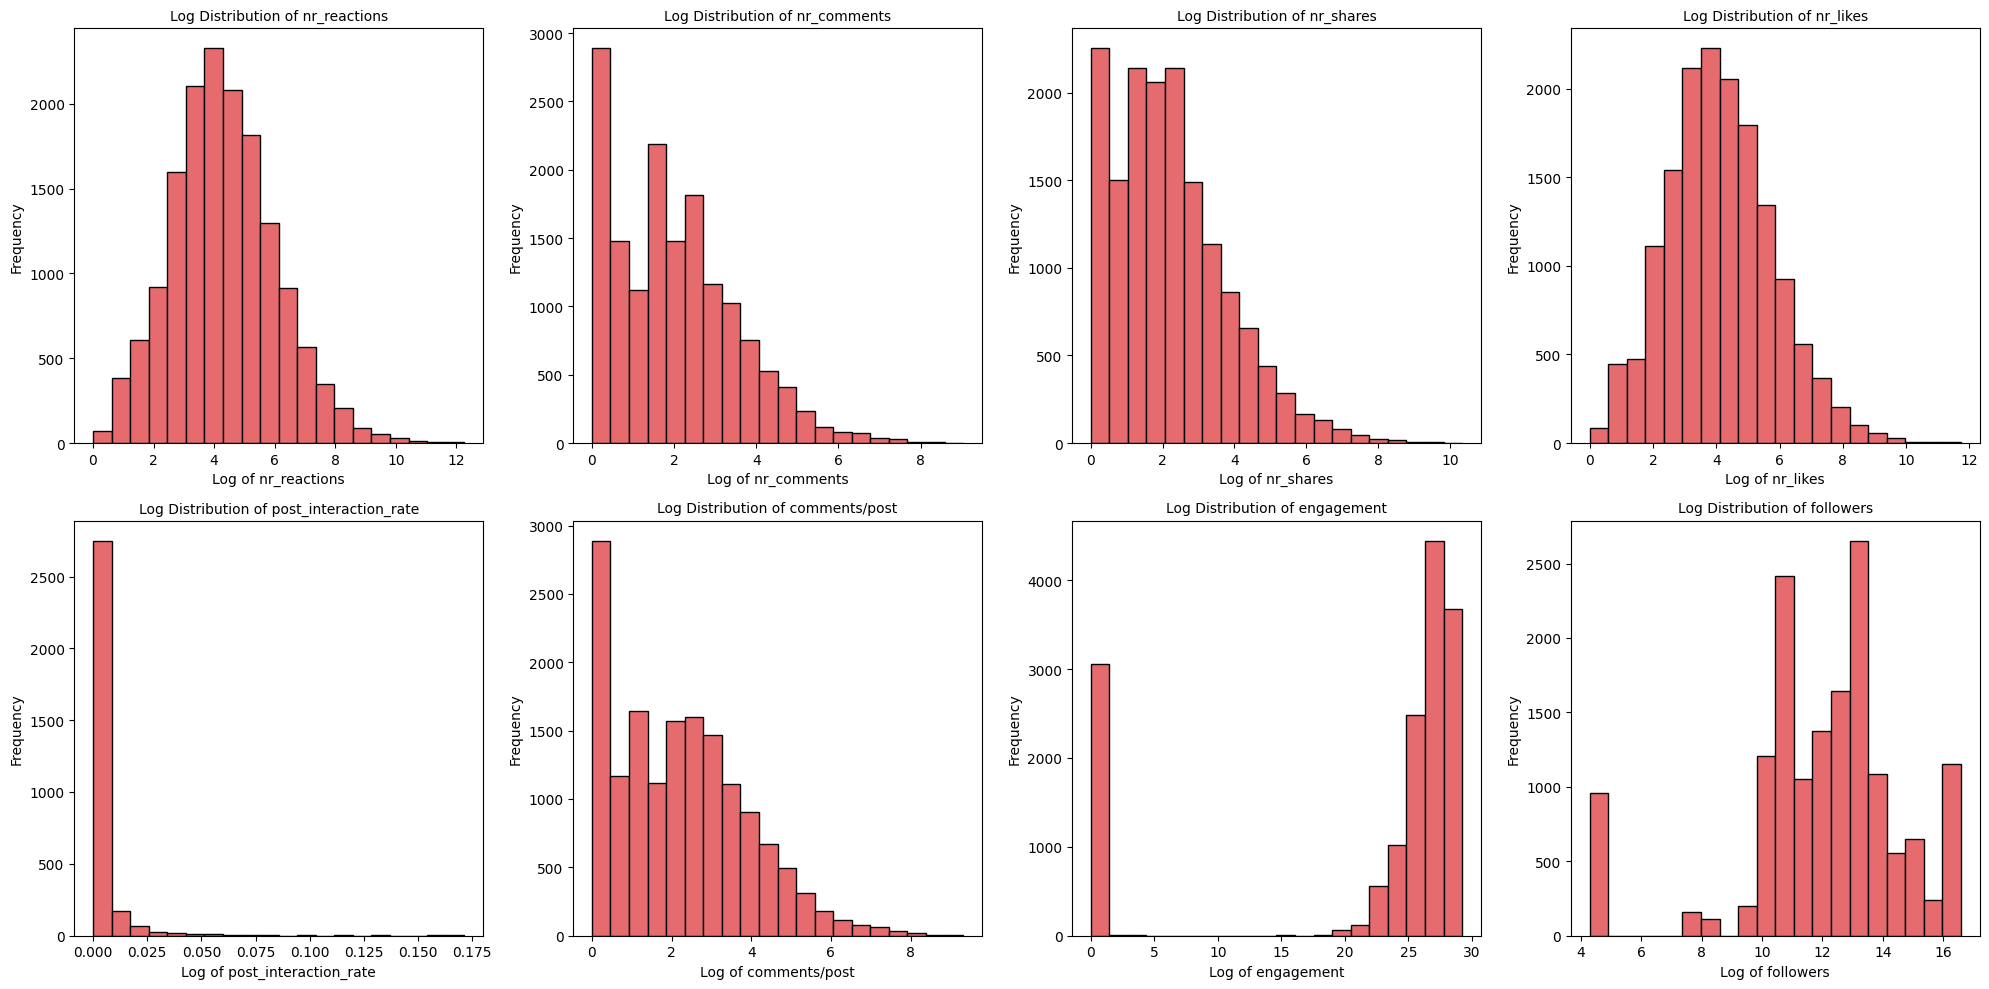

In [575]:
# Ensure the columns are numeric
for col in numeric_columns:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2x4 grid, figsize can be adjusted

# Flatten the array of axes for easy iteration
axs = axs.ravel()

# Loop through the numeric columns and create a histogram for each with log scale
for i, col in enumerate(numeric_columns):
    # Drop NaN values and apply log transformation to the data
    log_data = np.log1p(combined_df[col].dropna())

    # Plot with log_data
    axs[i].hist(log_data, bins=20, color='#e56b6f', edgecolor='black')
    axs[i].set_title(f'Log Distribution of {col}', fontsize=10)
    axs[i].set_xlabel(f'Log of {col}')
    axs[i].set_ylabel('Frequency')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()

This second set of graphs represents the **log-transformed** distributions of the same metrics.*The *log transformation helps to normalize the data and provide a clearer picture of the distribution* patterns:

* **Reactions, Comments, Shares, Likes (Log-transformed):** After the log transformation, the data shows a more symmetrical distribution, especially for reactions and likes, indicating that when viewed on a logarithmic scale, the engagement metrics are less skewed.

* **Post Interaction Rate and Engagement (Log-transformed):** The post interaction rate and engagement, when log-transformed, appear to follow a log-normal distribution, suggesting that engagement metrics tend to multiply rather than add.

* **Comments/Post (Log-transformed):** The log-transformed histogram for comments per post seems to indicate a more normalized distribution, but still showing some skewness.

* **Followers (Log-transformed):** The followers histogram, once log-transformed, presents a multimodal distribution, indicating several distinct groups of follower counts within the themepark profiles.

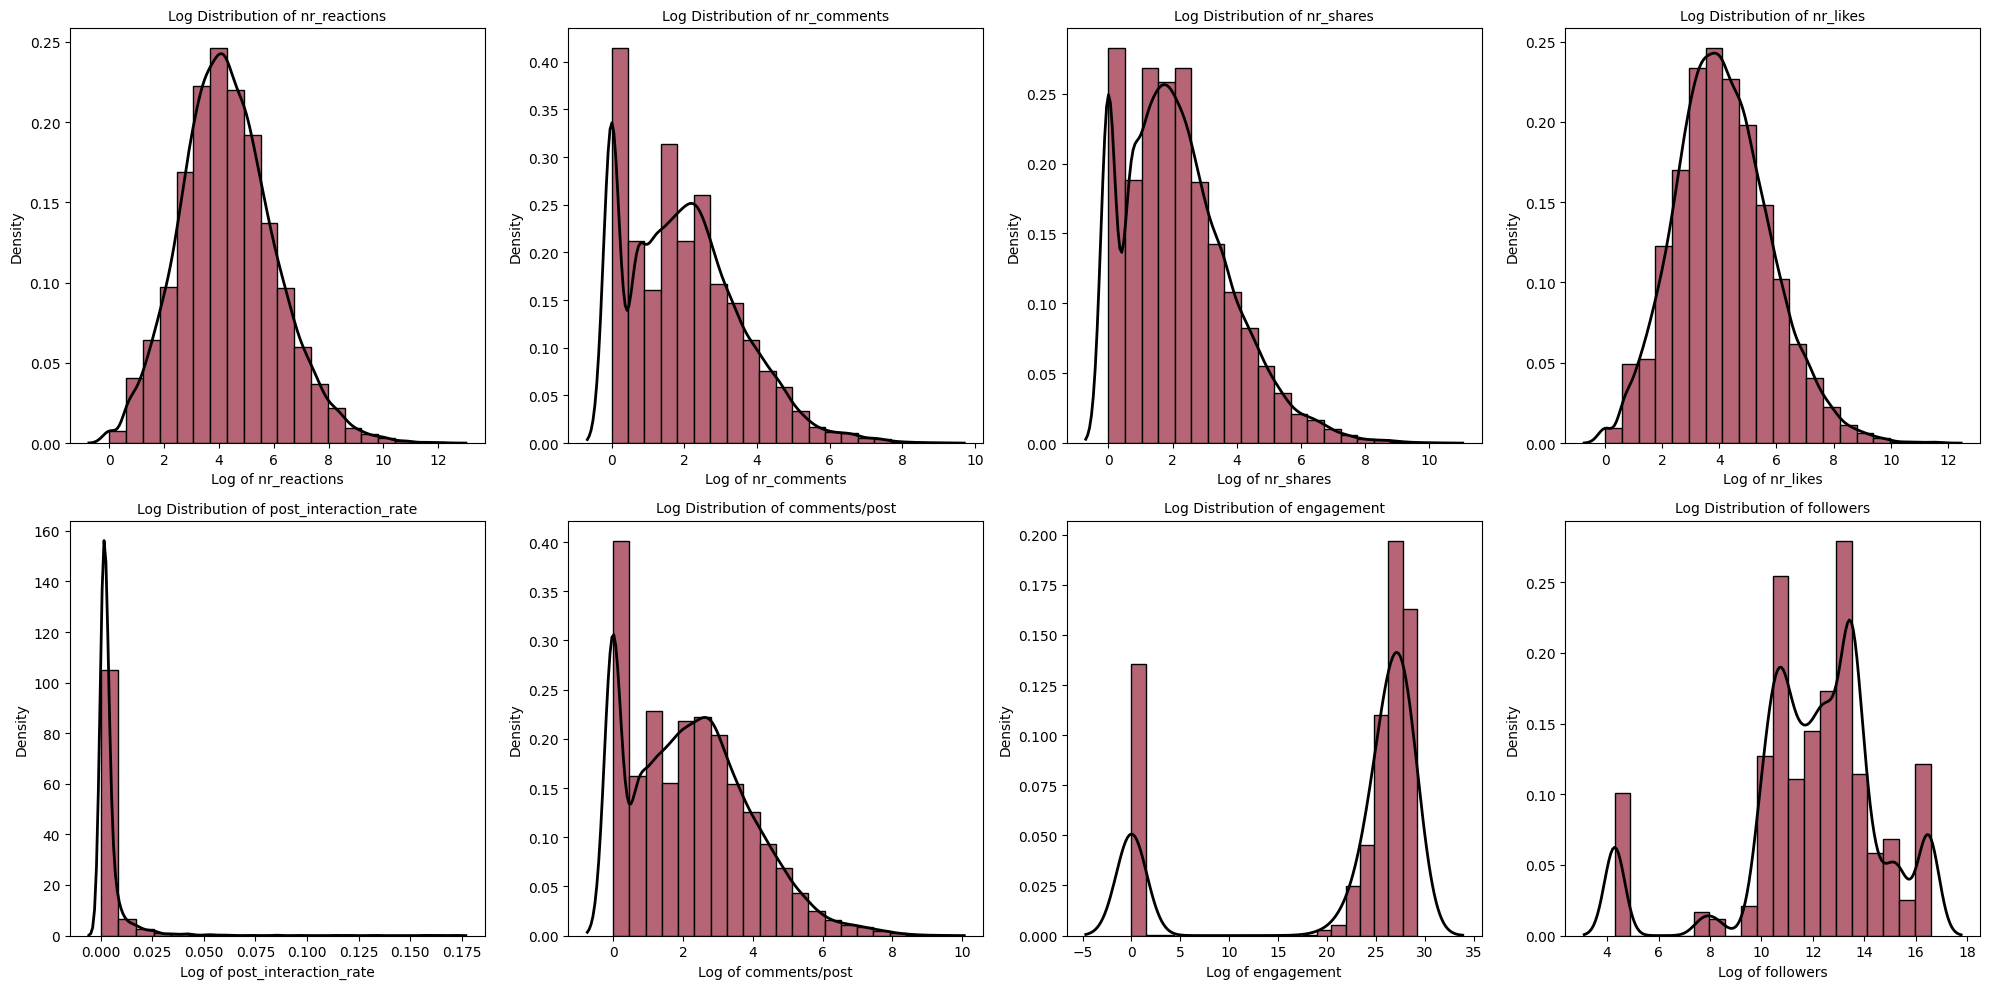

In [576]:
# Ensure the columns are numeric
for col in numeric_columns:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2x4 grid, figsize can be adjusted

# Flatten the array of axes for easy iteration
axs = axs.ravel()

# Loop through the numeric columns and create a histogram for each with log scale
for i, col in enumerate(numeric_columns):
    # Drop NaN values and apply log transformation to the data
    log_data = np.log1p(combined_df[col].dropna())

    # Plot with log_data
    axs[i].hist(log_data, bins=20, color='#b56576', edgecolor='black', density=True)
    # Overlay the KDE line
    sns.kdeplot(log_data, color="black", ax=axs[i], linewidth=2)

    # Set titles and labels
    axs[i].set_title(f'Log Distribution of {col}', fontsize=10)
    axs[i].set_xlabel(f'Log of {col}')
    axs[i].set_ylabel('Density')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()

The last set of graphs *including trend lines offer a **kernel density estimate** over the histograms*:

* **Kernel Density Estimate:** These lines smoothly estimate the probability density function of the engagement metrics. The trend lines provide a *clearer picture of the data's distribution*, especially highlighting the modes within the data.

* **Comparison with Histograms:** Comparing the trend lines with the histograms, we can infer the *central tendencies and variabilities within each engagement metric*, and identify *any outliers or anomalies that might not be immediately evident from the histograms alone.*

* **Insight into Data Distribution:** *The kernel density lines reveal the true underlying trends in the data*, which are sometimes obscured in the histograms due to binning strategies. For example, they might show a smoother peak or highlight where most data points are concentrated, which is particularly useful for multimodal distributions.

The presence of the *trend lines in our histograms should help in the interpretation of the data*, offering insights into the typical values and the spread of the engagement metrics. 

In [577]:
combined_df.head()

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,72
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000


# **3. Feature Engineering/Creation**

### **3.1 New Feature: Engagement**
Since we do not know, how the Engagement Feature which of the original dataframe was calculated, we decided to come up with a new own calculation, based on the Metrics of the *Fanpage Karma Academy* (2022). The source indicates that the engagement is rated in the following way: the number of likes counts as 1, the number of comments counts as 2, and the number of shares counts as 3.

Reference: Fanpage Karma. (2020, December 22). Metrics Overview – fanpage Karma Academy. Fanpage Karma Academy. https://academy.fanpagekarma.com/en/metrics/

In [578]:
#engagement calculation
combined_df['engagement2'] = ((combined_df['nr_likes'] * 1) + (combined_df['nr_comments'] * 2) + (combined_df['nr_shares'] * 3)/ combined_df['followers'])

# Display the DataFrame with the new column
combined_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement2
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,72,17.083333


### **3.2 Creating follower Groups**

In [579]:
#show quartiles for categorising them afterwards
combined_df['followers'].describe()

count    1.544300e+04
mean     1.601747e+06
std      3.822490e+06
min      7.200000e+01
25%      4.800000e+04
50%      2.620000e+05
75%      6.920000e+05
max      1.600000e+07
Name: followers, dtype: float64

In [580]:
#group followers into 3 categories based on the quartiles
combined_df['followers'] = combined_df['followers'].apply(lambda x: 'low' if x <= 48000 else 'medium' if x <= 692000 else 'high')


In [581]:
#drop the 'engagement' column
combined_df.drop('engagement', axis=1, inplace=True)
#display combined_df
combined_df.head(5)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement2
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,35.000060
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,25.000090
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,582.000007
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20.000000


In [582]:
#rename the 'weighted engagement' column to 'engagement'
combined_df.rename(columns={'engagement2': 'engagement'}, inplace=True)
#display combined_df
combined_df.head(5)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,35.000060
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,25.000090
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,582.000007
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20.000000


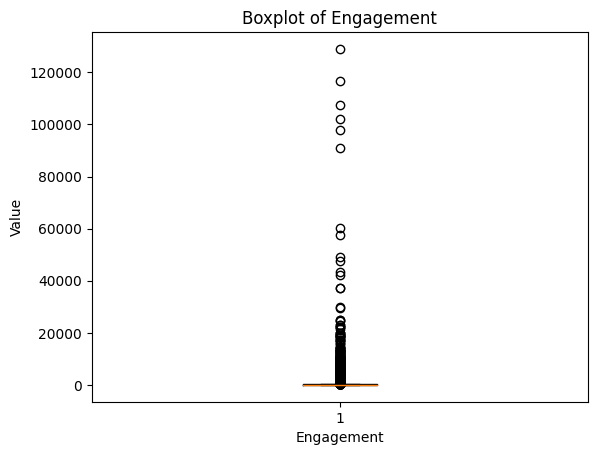

In [583]:
plt.boxplot(combined_df['engagement'])
plt.title('Boxplot of Engagement')
plt.xlabel('Engagement')
plt.ylabel('Value')
plt.show()


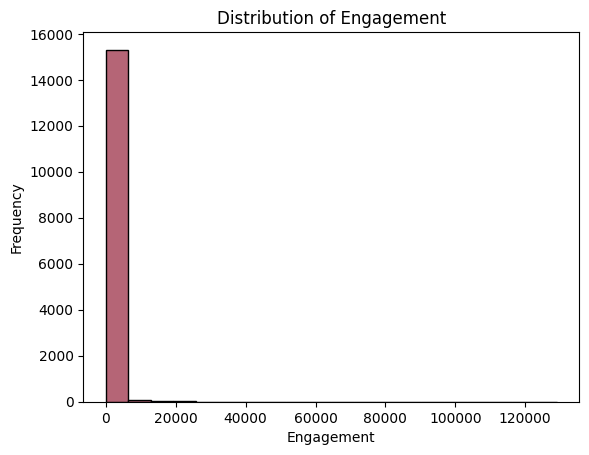

In [584]:
plt.hist(combined_df['engagement'], bins=20, color='#b56576', edgecolor='black')
plt.title('Distribution of Engagement')
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.show()


In [585]:
combined_df = combined_df[combined_df['engagement'] <= 2000]


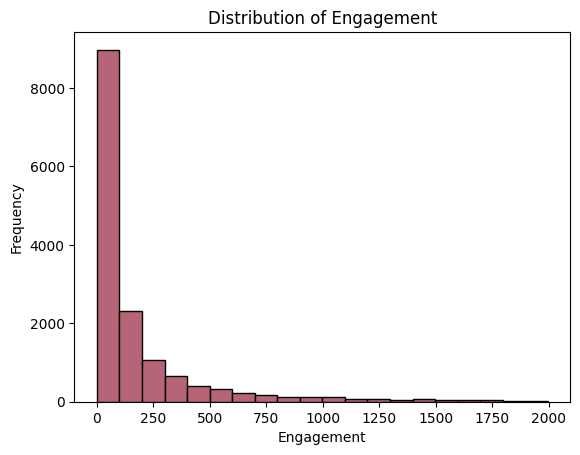

In [586]:
plt.hist(combined_df['engagement'], bins=20, color='#b56576', edgecolor='black')
plt.title('Distribution of Engagement')
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.show()


In [587]:
combined_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,35.000060
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,25.000090
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,582.000007
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,low,22.000000
15439,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,low,9.000000
15440,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,high,701.000018
15441,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,medium,63.000013


In [589]:
#display the number of rows
df_original_len = len(combined_df)
print('Original length of dataframe:', df_original_len)


Original length of dataframe: 14909


# **4. Exporting the combined/cleaned Dataset** for further Analytics

In [588]:
#the combined df will be pushed to our github repository
combined_df.to_csv('combined_themepark_dataset.csv', index=False)